In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0


In [9]:
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [10]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [11]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [12]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [13]:
# recent_yr=data.Outlet_Establishment_Year.max()
# data['Outlet_age']= (recent_yr+1)-data.Outlet_Establishment_Year

In [14]:
data.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
data['Item_category']=data.Item_Identifier.map(lambda x: x[:2])

In [16]:
data.Item_category.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_category, dtype: int64

In [17]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC


## handling Missing data

In [18]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
Item_category                   0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

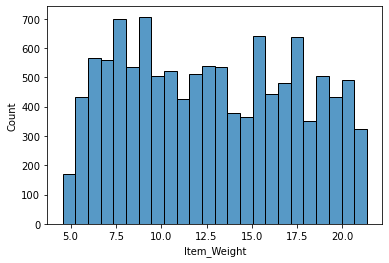

In [19]:
sns.histplot(data['Item_Weight'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

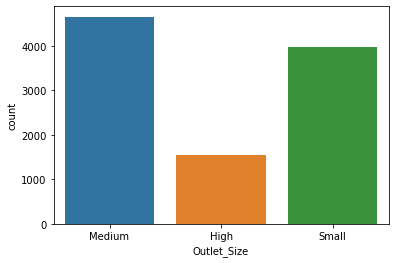

In [20]:
sns.countplot(data=data,x='Outlet_Size')

In [21]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
Item_category                    3
dtype: int64

## handling missing values
- using mean
- using mode

#### You can use mean value to replace the missing values in case the data distribution is symmetric.Consider using median or mode with skewed data distribution.

In [22]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
Item_category                   0
dtype: int64

In [23]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
missing_values = data['Item_Weight'].isnull()

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier']\
.apply(lambda x: item_avg_weight.at[x,'Item_Weight'])

In [24]:
# data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
Item_category                   0
dtype: int64

In [25]:
data.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [26]:
outlet_size_mode= data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [27]:
missing_values=data.Outlet_Size.isnull()

In [28]:
data.loc[missing_values, 'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [29]:
data[['Outlet_Size','Outlet_Type']]

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,Small,Grocery Store
4,High,Supermarket Type1
...,...,...
5676,Small,Supermarket Type1
5677,Medium,Supermarket Type2
5678,Small,Supermarket Type1
5679,Small,Supermarket Type1


In [30]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_category                0
dtype: int64

## EDA

In [31]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.065953,141.004977,1997.830681,1308.865489
std,4.651716,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
sns.set()

<Figure size 576x576 with 0 Axes>

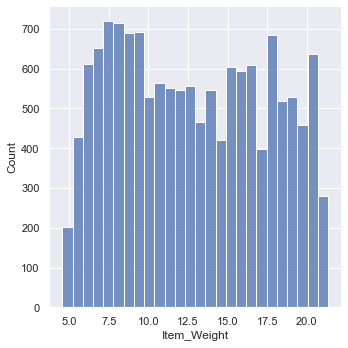

In [33]:
plt.figure(figsize=(8,8))
sns.displot(data.Item_Weight)

<Figure size 576x576 with 0 Axes>

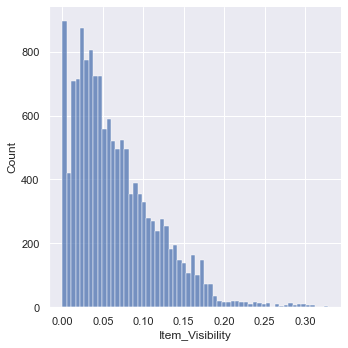

In [34]:
plt.figure(figsize=(8,8))
sns.displot(data.Item_Visibility)

<Figure size 576x576 with 0 Axes>

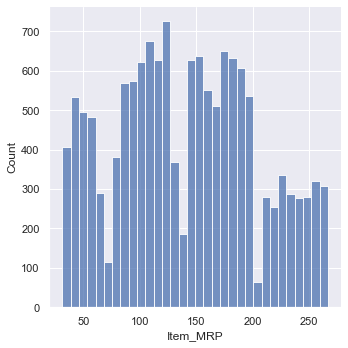

In [35]:
plt.figure(figsize=(8,8))
sns.displot(data.Item_MRP)

<Figure size 576x576 with 0 Axes>

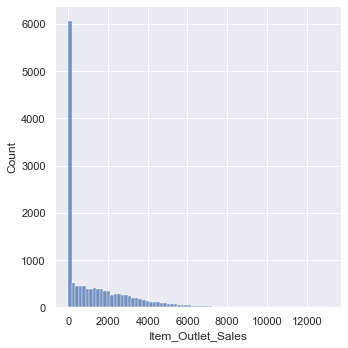

In [36]:
plt.figure(figsize=(8,8))
sns.displot(data.Item_Outlet_Sales)

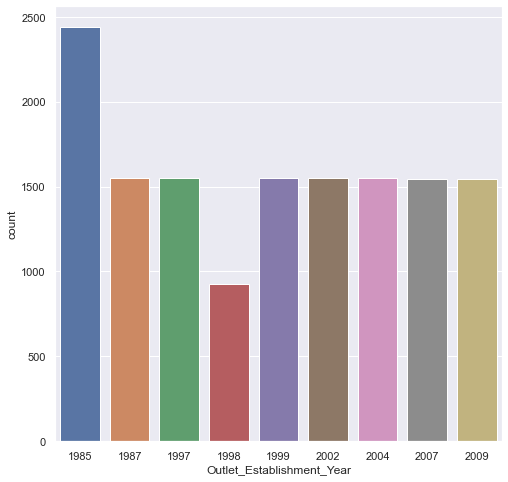

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(data=data,x='Outlet_Establishment_Year')
plt.show()

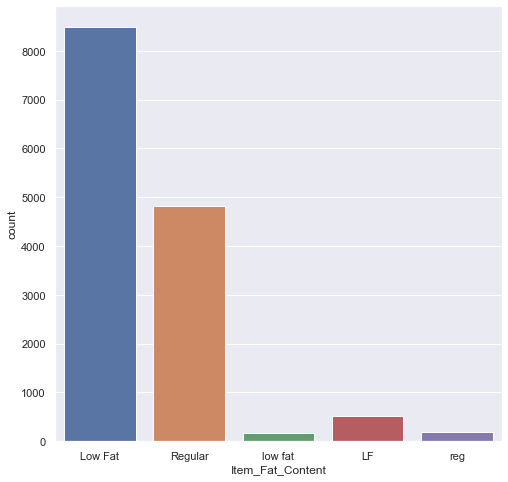

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(data=data,x='Item_Fat_Content')
plt.show()

In [39]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [40]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}},inplace=True)

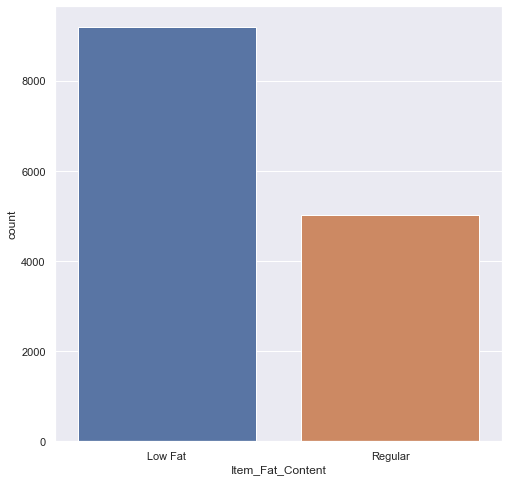

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(data=data,x='Item_Fat_Content')
plt.show()

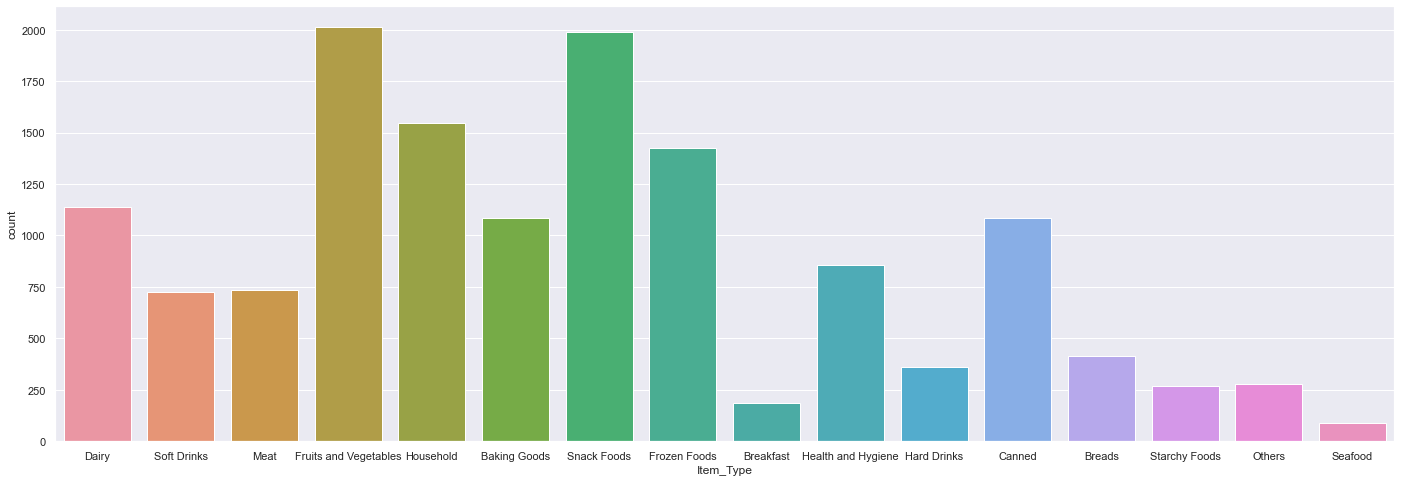

In [42]:
plt.figure(figsize=(24,8))
sns.countplot(data=data,x='Item_Type')
plt.show()

## we can use the same approach for Item_Type as we did for Item_Fat_Content, but for now lets train it this way only

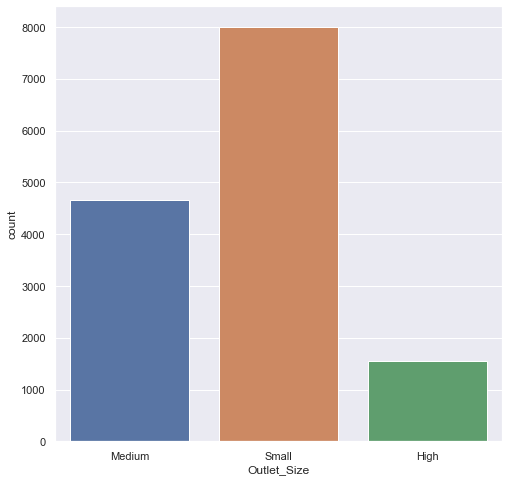

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(data=data,x='Outlet_Size')
plt.show()

## make subsets of catergorical and numerical data

In [44]:
categorial_features = data.select_dtypes(include=[object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_category
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,DR


In [45]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


<AxesSubplot:>

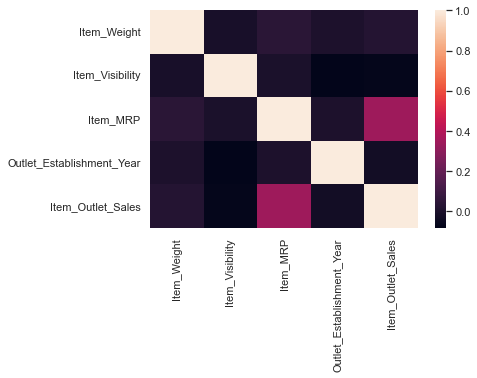

In [46]:
sns.heatmap(numerical_features.corr())

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC


## Data Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder

- converting Item_Identifier data into numeric using LabelEncoder()

In [49]:
encoder=LabelEncoder()

In [50]:
categorial_features=categorial_features.columns.tolist()

In [51]:
data['Item_Identifier']= encoder.fit_transform(data['Item_Identifier'])

In [52]:
data.Item_Identifier

0        156
1          8
2        662
3       1121
4       1297
        ... 
5676     233
5677     308
5678    1426
5679     521
5680     997
Name: Item_Identifier, Length: 14204, dtype: int64

- converting all categorical data into numeric using LabelEncoder()

In [53]:
for cat in categorial_features:
    data[cat]= encoder.fit_transform(data[cat])

In [54]:
data[categorial_features]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_category
0,156,0,4,9,1,0,1,1,1
1,8,1,14,3,1,2,2,1,0
2,662,0,10,9,1,0,1,1,1
3,1121,1,6,0,2,2,0,1,1
4,1297,0,9,1,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...
5676,233,1,13,8,2,0,1,0,1
5677,308,1,15,3,1,2,2,0,1
5678,1426,0,8,7,2,1,1,0,2
5679,521,1,3,2,2,1,1,0,1


In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_category
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,1,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,1,2


## feature and target column

In [56]:
#Item_Outlet_Sales is our target column, so we'll be slpitting out dataset into X --> features, y-->Target
X=data.drop(columns='Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [57]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156         9.30                 0         0.016047   
1                   8         5.92                 1         0.019278   
2                 662        17.50                 0         0.016760   
3                1121        19.20                 1         0.000000   
4                1297         8.93                 0         0.000000   
...               ...          ...               ...              ...   
5676              233        10.50                 1         0.013496   
5677              308         7.60                 1         0.142991   
5678             1426        10.00                 0         0.073529   
5679              521        15.30                 1         0.000000   
5680              997         9.50                 1         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [58]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
5676       0.0000
5677       0.0000
5678       0.0000
5679       0.0000
5680       0.0000
Name: Item_Outlet_Sales, Length: 14204, dtype: float64


## split data into train and test data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_category
8157,1166,14.35,0,0.080204,0,77.9960,5,1985,1,2,3,1,1
5015,455,11.60,1,0.078915,5,83.1276,6,2004,2,1,1,0,1
937,424,13.65,0,0.065576,5,47.7402,1,1987,0,2,1,1,1
2195,464,20.50,1,0.032136,5,83.9592,0,1998,2,2,0,1,1
2226,1496,5.88,0,0.025028,9,150.4392,2,2007,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,1395,20.50,0,0.023143,11,152.9340,8,1997,2,0,1,0,2
5373,1049,11.30,0,0.007245,10,198.3426,5,1985,1,2,3,0,1
6637,969,18.70,1,0.092096,10,183.3292,2,2007,2,1,1,1,1
2575,55,8.88,0,0.086957,7,152.5682,7,2002,2,1,1,1,0


In [62]:
y_train

8157    2716.4640
5015       0.0000
937      643.1628
2195     165.1184
2226       0.0000
          ...    
3275       0.0000
5373       0.0000
6637    2006.7212
2575    1372.2138
7336    1830.9500
Name: Item_Outlet_Sales, Length: 11363, dtype: float64

In [63]:
X_train.shape, y_train.shape

((11363, 13), (11363,))

In [64]:
X_train.shape, X_test.shape

((11363, 13), (2841, 13))

In [65]:
11363/(11363+2841) , 2841/(11363+2841)  #80% train 20% test

(0.7999859194593072, 0.20001408054069275)

## model trainig

In [66]:
from xgboost import XGBRegressor

In [67]:
regressor=XGBRegressor()

In [68]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## predict and evaluate

In [69]:
predicted= regressor.predict(X_train)

In [70]:
from sklearn import metrics

In [71]:
rsqr_value=metrics.r2_score(y_train,predicted)

In [72]:
rsqr_value #values near to 1 consider as good

0.8907234063345882

In [73]:
predict_test= regressor.predict(X_test)

In [74]:
rsqr_value=metrics.r2_score(y_test,predict_test)

In [75]:
rsqr_value

0.7174933249621291

In [76]:
predict_test

array([ 1.2139411e+00, -1.3869546e+01,  2.6296978e+03, ...,
        6.3394196e+01, -1.5050865e+02, -3.2367786e+01], dtype=float32)

In [77]:
predict_test.shape

(2841,)

In [78]:
np.sqrt(metrics.mean_squared_error(y_test,predict_test))

891.620243286104

In [79]:
metrics.r2_score(y_test,predict_test)

0.7174933249621291

In [80]:
metrics.mean_absolute_error(y_test,predict_test)

526.4223094037441

In [81]:
from bokeh.plotting import figure, show,output_notebook
p = figure(width=400, height=400)
p.xaxis.axis_label = "Actual"
p.yaxis.axis_label = "predicted"
p.circle(y_test,predict_test, size=6, color="navy", alpha=0.5)
output_notebook()
show(p)

Loading BokehJS ...

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
lr_predict=lr.predict(X_test)

In [86]:
lr_predict

array([ -614.51281153, -1117.7868599 ,  2602.84247185, ...,
         532.40816314,   329.87129126,  -246.89258634])

In [87]:
lr_predict.shape

(2841,)

In [88]:
np.sqrt(metrics.mean_squared_error(y_test,lr_predict))

1093.094912975729

In [89]:
metrics.r2_score(y_test,lr_predict)

0.5753954732534277

In [90]:
metrics.mean_absolute_error(y_test,lr_predict)

831.1676467413105

In [91]:
fig = figure(width=400, height=400)
fig.xaxis.axis_label = "Actual"
fig.yaxis.axis_label = "predicted"
fig.circle(y_test,lr_predict, size=6, color="navy", alpha=0.5)
output_notebook()
show(p)

Loading BokehJS ...